# 기초적인 다중 분류(multiple classification) 예시
> 패션 MNIST 데이터셋을 활용하여 기초적인 신경망 훈련을 해본다. 예시 코드는 [텐서플로우 공식 홈페이지](https://www.tensorflow.org/tutorials/keras/classification?hl=ko#%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC)를 참고하였다. 진행 과정은 다음과 같다. 

- 패션 MNIST 데이터셋 불러오기
- 데이터 탐색
- 데이터 전처리
- 모델 구성
    - 층 설정
    - 모델 컴파일
- 모델 훈련
- 정확도 평가
- 예측 만들기

In [1]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 텐서플로우 버전 확인
print(tf.__version__)

2.1.0


## 패션 MNIST 데이터셋 불러오기
> keras에 포함된 데이터셋을 불러온다. 데이터셋 정보는 다음과 같다.

- 이미지 크기 28x28, pixels 0~255
- 데이터의 레이블과 클래스는 이하와 같다.
    - 0 : T-shirt/top
    - 1 : Trouser
    - 2 : Pullover
    - 3 : Dress
    - 4 : Coat
    - 5 : Sandal
    - 6 : Shirt
    - 7 : Sneaker
    - 8 : Bag
    - 9 : Ankle boot

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

## 데이터 전처리

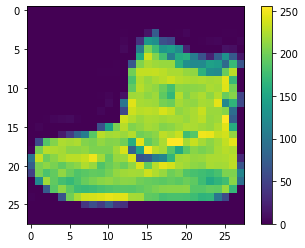

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

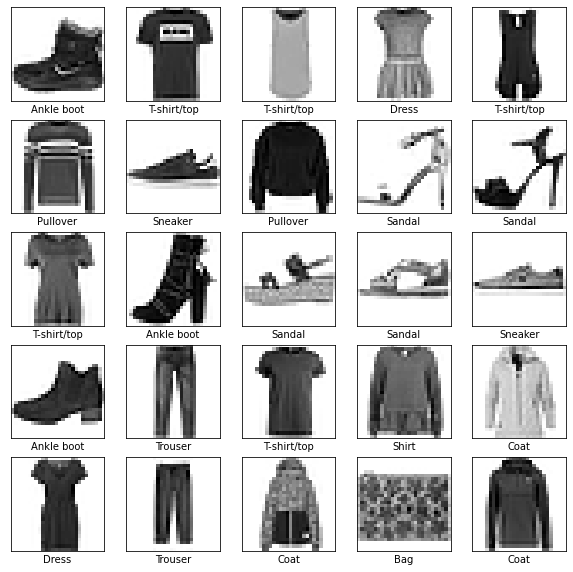

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

### 층 설정

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### 모델 컴파일

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 훈련

In [15]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4958 - accuracy: 0.8249
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3714 - accuracy: 0.8659
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3339 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3092 - accuracy: 0.8868
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2940 - accuracy: 0.8912
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2780 - accuracy: 0.8969
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2669 - accuracy: 0.9018
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2567 - accuracy: 0.9038
Epoch 9/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2464 - accuracy: 0.9083
Epoch 10/10
60

### 정확도 평가

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도 :', test_acc)

10000/10000 - 1s - loss: 0.3376 - accuracy: 0.8938

테스트 정확도 : 0.8938


### 예측 만들기

In [44]:
predictions = model.predict(test_images)

In [45]:
predictions[0]

array([3.06780179e-09, 5.14926268e-10, 4.93671326e-09, 2.02671005e-10,
       1.12686109e-08, 1.05111365e-04, 1.43833043e-08, 1.92647316e-02,
       2.16788862e-08, 9.80630100e-01], dtype=float32)

In [46]:
np.argmax(predictions[0])

9

In [47]:
test_labels[0]

9

In [49]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
               
def plot_value_array(i, predictions_array, true_label):
               predictions_array, true_label = predictions_array[i], true_label[i]
               plt.grid(False)
               plt.xticks([])
               plt.yticks([])
               thisplot = plt.bar(range(10), predictions_array, color="#777777")
               plt.ylim([0, 1])
               predicted_label = np.argmax(predictions_array)
               
               thisplot[predicted_label].set_color('red')
               thisplot[true_label].set_color('blue')
               
               

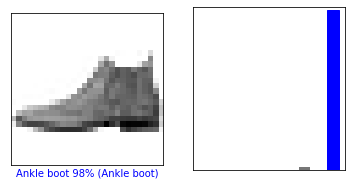

In [50]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

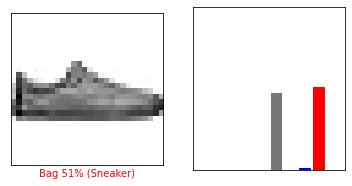

In [51]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

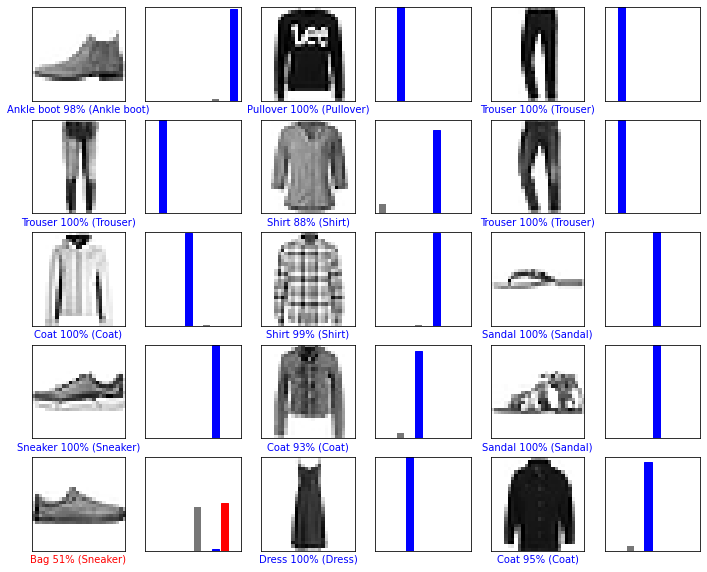

In [52]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [53]:
img = test_images[0]

In [54]:
print(img.shape)

(28, 28)


In [55]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [56]:
predictions_single = model.predict(img)
print(predictions_single)

[[3.0678018e-09 5.1492821e-10 4.9367133e-09 2.0267060e-10 1.1268589e-08
  1.0511127e-04 1.4383304e-08 1.9264741e-02 2.1678886e-08 9.8063010e-01]]


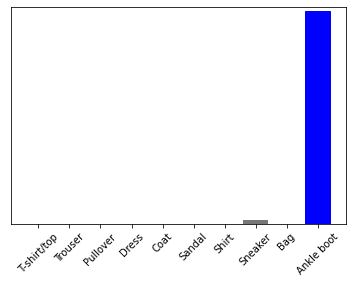

In [57]:
plot_value_array(0, predictions_single, test_labels)
_=plt.xticks(range(10), class_names, rotation=45)

In [58]:
np.argmax(predictions_single[0])

9